<a href="https://colab.research.google.com/github/ancestor9/Gyeongbok-AI-study/blob/main/gaussian_basis_funtion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = 'https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.06-gaussian-basis.png'>

- 이 그림을 캡쳐하여
- chatGPT(무료버전)에게
- prompt : "별첨의 내용을 가우시안 기저함수를 사용하여 가상데이터를 fit하고 파이썬 코드를 만들러 시각화 해줘"라고 하면,
- 아래 코드를 만들어 줌

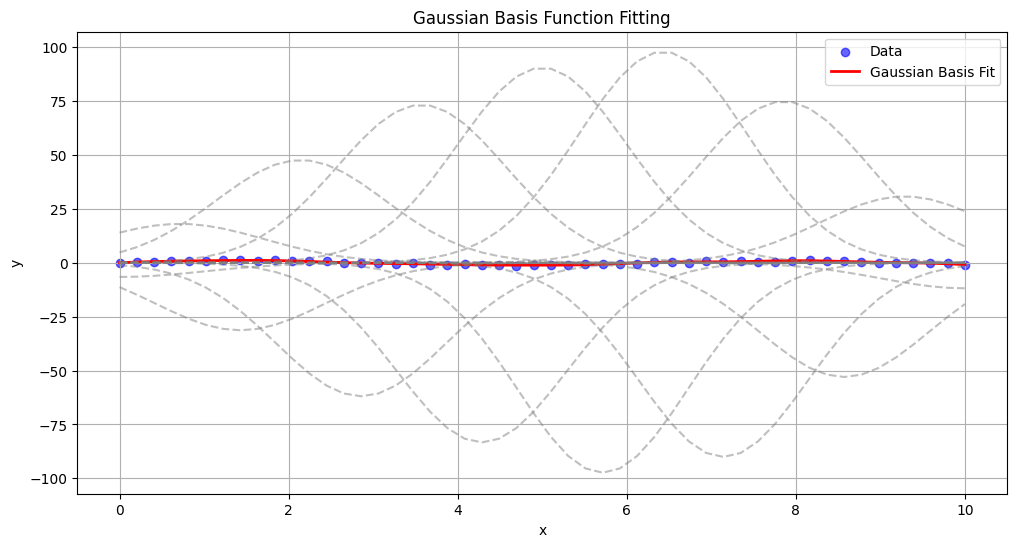

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 가상 데이터 생성
np.random.seed(42)
x = np.linspace(0, 10, 50)  # 입력 데이터
y = np.sin(x) + np.random.normal(scale=0.3, size=x.shape)  # 노이즈 추가

# 2. 가우시안 기저 함수 정의
def gaussian_basis(x, centers, sigma):
    """가우시안 기저 함수 변환"""
    return np.exp(-0.5 * ((x[:, None] - centers[None, :]) / sigma) ** 2)


# 3. 기저 함수 생성
centers = np.linspace(0, 10, 15)  # 중심값들
sigma = 1.0  # 가우시안 너비
X_basis = gaussian_basis(x, centers, sigma)

# 4. 선형 회귀 모델 피팅
weights, _, _, _ = np.linalg.lstsq(X_basis, y, rcond=None)  # 가중치 계산
y_pred = X_basis @ weights  # 예측값

# 5. 시각화
plt.figure(figsize=(12, 6))

# 원본 데이터와 피팅된 데이터
plt.scatter(x, y, label="Data", color="blue", alpha=0.6)
plt.plot(x, y_pred, label="Gaussian Basis Fit", color="red", linewidth=2)

# 가우시안 기저 함수들 시각화
for i, center in enumerate(centers):
    plt.plot(x, weights[i] * gaussian_basis(x, np.array([center]), sigma).flatten(), # Convert [center] to a NumPy array
             color="gray", alpha=0.5, linestyle="--")

# 그래프 설정
plt.title("Gaussian Basis Function Fitting")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


### y축 단위가 너무 크기 때문에 가우시안분포보다는 y축 데이터를 좀더 시각화하기 위해

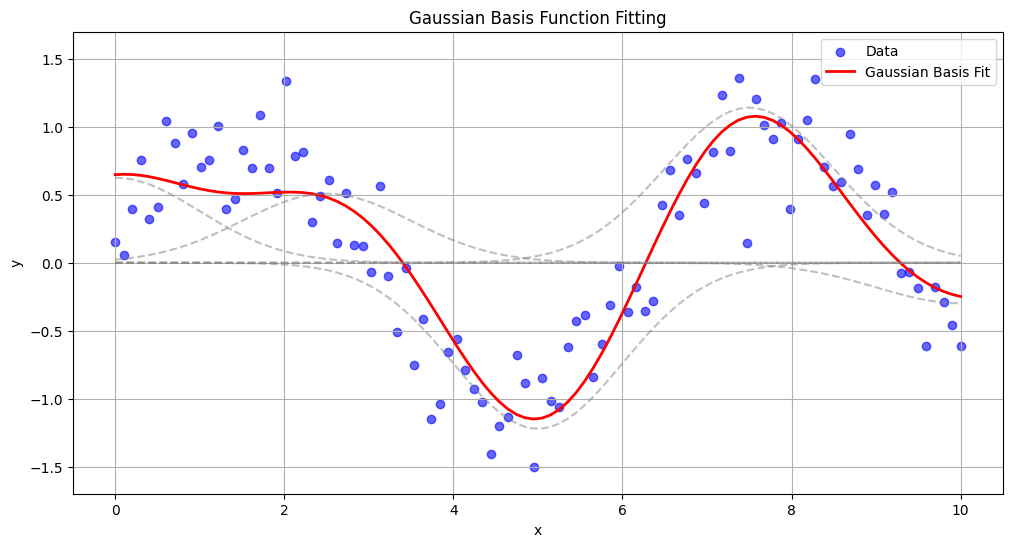

In [8]:
# prompt: y 값의 최소, 최대 값을 설정하는 코드

import numpy as np
import matplotlib.pyplot as plt

# 1. 가상 데이터 생성
np.random.seed(42)
range_of_data = 10
x = np.linspace(0, range_of_data, 100)  # 입력 데이터
y = np.sin(x) + np.random.normal(scale=0.3, size=x.shape)  # 노이즈 추가

# y 값의 최소, 최대 값 설정
y_min = -1.5  # y 값의 최소값 설정
y_max = 1.5   # y 값의 최대값 설정
y = np.clip(y, y_min, y_max) # y 값을 최소, 최대값으로 clip

# 2. 가우시안 기저 함수 정의
def gaussian_basis(x, centers, sigma):
    """가우시안 기저 함수 변환"""
    return np.exp(-0.5 * ((x[:, None] - centers[None, :]) / sigma) ** 2)


# 3. 기저 함수 생성
number_of_centers = 5
centers = np.linspace(0, 10, number_of_centers)  # 중심값들
sigma = 1.0  # 가우시안 너비
X_basis = gaussian_basis(x, centers, sigma)

# 4. 선형 회귀 모델 피팅
weights, _, _, _ = np.linalg.lstsq(X_basis, y, rcond=None)  # 가중치 계산
y_pred = X_basis @ weights  # 예측값

# 5. 시각화
plt.figure(figsize=(12, 6))

# 원본 데이터와 피팅된 데이터
plt.scatter(x, y, label="Data", color="blue", alpha=0.6)
plt.plot(x, y_pred, label="Gaussian Basis Fit", color="red", linewidth=2)

# 가우시안 기저 함수들 시각화
for i, center in enumerate(centers):
    plt.plot(x, weights[i] * gaussian_basis(x, np.array([center]), sigma).flatten(), # Convert [center] to a NumPy array
             color="gray", alpha=0.5, linestyle="--")

# 그래프 설정
plt.title("Gaussian Basis Function Fitting")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

# y축 범위 설정
plt.ylim(y_min - 0.2, y_max + 0.2) # y축 범위를 약간 더 넓게 설정


plt.show()

In [13]:
# prompt: gradio 를 r기반으로 number_of_centers, sigma 를 입력변수로 하여 시각화하는 코드를 만들어줘

!pip install gradio --quiet

import gradio as gr
import numpy as np
import matplotlib.pyplot as plt

def gaussian_basis(x, centers, sigma):
    """가우시안 기저 함수 변환"""
    return np.exp(-0.5 * ((x[:, None] - centers[None, :]) / sigma) ** 2)

def plot_gaussian_basis(number_of_centers, sigma):
    np.random.seed(42)
    range_of_data = 10
    x = np.linspace(0, range_of_data, 100)
    y = np.sin(x) + np.random.normal(scale=0.3, size=x.shape)
    y_min = -1.5
    y_max = 1.5
    y = np.clip(y, y_min, y_max)

    centers = np.linspace(0, 10, int(number_of_centers))
    X_basis = gaussian_basis(x, centers, sigma)
    weights, _, _, _ = np.linalg.lstsq(X_basis, y, rcond=None)
    y_pred = X_basis @ weights

    plt.figure(figsize=(12, 6))
    plt.scatter(x, y, label="Data", color="blue", alpha=0.6)
    plt.plot(x, y_pred, label="Gaussian Basis Fit", color="red", linewidth=2)

    for i, center in enumerate(centers):
        plt.plot(x, weights[i] * gaussian_basis(x, np.array([center]), sigma).flatten(),
                 color="gray", alpha=0.5, linestyle="--")

    plt.title("Gaussian Basis Function Fitting")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.ylim(y_min - 0.2, y_max + 0.2)

    plt.savefig("gaussian_plot.png") # Save the plot to a file
    return "gaussian_plot.png" # Return the filename


iface = gr.Interface(
    fn=plot_gaussian_basis,
    inputs=[
        gr.Number(label="Number of Centers", value=5),
        gr.Number(label="Sigma", value=1.0),
    ],
    outputs=gr.Image(label="Gaussian Basis Function Plot"),
    title="Gaussian Basis Function Visualization",
    description="Visualize Gaussian basis function fitting with adjustable parameters (simulate 100 sample from 0 to 10)."
)

iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://dab22d183764e1434d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
